<a href="https://colab.research.google.com/github/Bachelie-r/ML_with_Pytorch/blob/main/PyTorch_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

def compute_z(a, b, c):
      r1 = torch.sub(a, b)
      r2 = torch.mul(r1, 2)
      z = torch.add(r2, c)
      return z

print('스칼라 입력:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))
print('랭크 1 입력:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('랭크 2 입력:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

스칼라 입력: tensor(1)
랭크 1 입력: tensor([1])
랭크 2 입력: tensor([[1]])


In [ ]:
a = torch.tensor(3.14, requires_grad=True)
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(a)
print(b)

tensor(3.1400, requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


텐서 객체의 grad 기본값은 False 객체에 requires_grad() 메서드롤 호출해 True로 변경가능

In [ ]:
w = torch.tensor([1.0, 2.0, 3.0])

print(w.requires_grad)

False


In [ ]:
w.requires_grad_()

print(w.requires_grad)

True


### 텐서 init

In [ ]:
import torch.nn as nn


torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [ ]:
class MyModule(nn.Module):
      def __init__(self):
          super().__init__()
          self.w1 = torch.empty(2, 3, requires_grad=True)
          nn.init.xavier_normal_(self.w1)
          self.w2 = torch.empty(1, 2, requires_grad=True)
          nn.init.xavier_normal_(self.w2)

# 13.4 자동 미분으로 그레이디언트 계산

In [ ]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)

x = torch.tensor([1.4])
y = torch.tensor([2.1])


z = torch.add(torch.mul(w, x), b)
z.requires_grad_()

loss = (y-z).pow(2).sum()
loss.backward()

print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)
z.grad

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


<ipython-input-13-0bd8cc484153>:16: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  z.grad


# 13.5 nn.Module

nn.Sequential 클래스

In [ ]:
model = nn.Sequential(
      nn.Linear(4, 16),
      nn.ReLU(),
      nn.Linear(16, 1),
      nn.Sigmoid()
                  )
model #nn.Sequential 클래스

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
model[0]

Linear(in_features=4, out_features=16, bias=True)

nn.Module 클래스

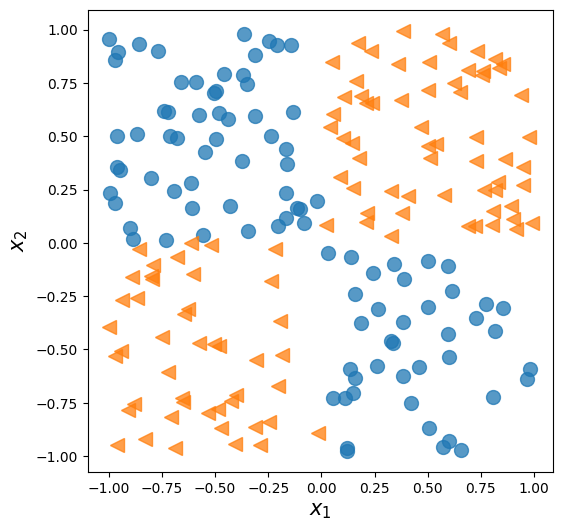

In [ ]:
#학습 데이터 #비선형 xor 분류
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0 #두 특성의 곱이 음수면 y=0 #NumPy나 PyTorch의 배열(텐서)의 불리언인덱싱

n_train = 100 #100는 트레인, 100개는 검증용
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

#시각화
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

plt.show()

In [ ]:
#배치 크기 2인 데이터 로더 만들기
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
class MyModule(nn.Module): #사용자 정의 상속클래스
      def __init__(self):
         super().__init__()
         l1 = nn.Linear(2, 4)
         a1 = nn.ReLU()
         l2 = nn.Linear(4, 4)
         a2 = nn.ReLU()
         l3 = nn.Linear(4, 1)
         a3 = nn.Sigmoid()
         l = [l1, a1, l2, a2, l3, a3]
         self.module_list = nn.ModuleList(l)

      def forward(self, x): #직접 어떤 연산이 일어날지 명시적으로 작성해야 함
         for f in self.module_list:
             x = f(x)
         return x


model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name}, Shape: {param.shape}")
    print(param.data)  # 실제 값
    print()

Layer: module_list.0.weight, Shape: torch.Size([4, 2])
tensor([[ 0.4317,  0.4762],
        [-0.2395,  0.6909],
        [-0.0817, -0.0243],
        [-0.6674, -0.4551]])

Layer: module_list.0.bias, Shape: torch.Size([4])
tensor([-0.4131, -0.3024,  0.5027, -0.2311])

Layer: module_list.2.weight, Shape: torch.Size([4, 4])
tensor([[-0.3736,  0.1924,  0.1601,  0.3238],
        [-0.2587,  0.1084, -0.1820, -0.1123],
        [-0.3985, -0.2279, -0.1531,  0.2138],
        [ 0.0913,  0.1235,  0.4991,  0.4873]])

Layer: module_list.2.bias, Shape: torch.Size([4])
tensor([ 0.3410,  0.0159, -0.3459,  0.3908])

Layer: module_list.4.weight, Shape: torch.Size([1, 4])
tensor([[-0.1250, -0.0404, -0.4307, -0.0988]])

Layer: module_list.4.bias, Shape: torch.Size([1])
tensor([-0.3225])



In [ ]:
model.module_list

ModuleList(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
#비용함수와 옵티마이저
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

In [ ]:
#학습 함수 정의
torch.manual_seed(1)

num_epochs = 200 #학습 반복(에포크단위) 횟수

def train(model, num_epochs, train_dl, x_valid, y_valid): #학습함수 생성
    #시각화부분
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() #시각화부분
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean() #시각화부분

        loss_hist_train[epoch] /= n_train/batch_size #시각화부분
        accuracy_hist_train[epoch] /= n_train/batch_size #시각화부분

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [ ]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

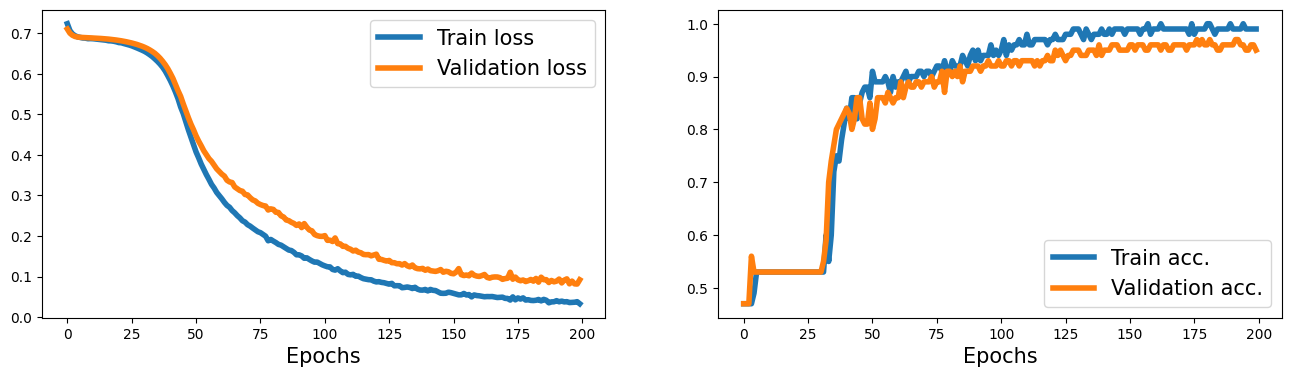

In [ ]:
#학습과정 시각화
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

파이토치에서 사용자 정의 층 만들기


파이토치에서 제공하지 않는 층을 새로 정의해야 하는 경우

In [ ]:
class NoisyLinear(nn.Module): #nn.Module을 상속받아 층을 정의함
      def __init__(self, input_size, output_size, noise_stddev=0.1):
         super().__init__()
         w = torch.Tensor(input_size, output_size)
         self.w = nn.Parameter(w)  # nn.Parameter는 모듈 파라미터 텐서입니다(학습대상).
         nn.init.xavier_uniform_(self.w)
         b = torch.Tensor(output_size).fill_(0)
         self.b = nn.Parameter(b)
         self.noise_stddev = noise_stddev

      def forward(self, x, training=False):
          if training: #훈련이라면 오차를 더한다.
             noise = torch.normal(0.0, self.noise_stddev, x.shape)
             x_new = torch.add(x, noise)
          else:
             x_new = x
          return torch.add(torch.mm(x_new, self.w), self.b)


In [ ]:
## 테스트:

torch.manual_seed(1)

noisy_layer = NoisyLinear(4, 2)

x = torch.zeros((1, 4))
print(noisy_layer(x, training=True)) #forward() 메서드가 실행되는 구조

print(noisy_layer(x, training=True))

print(noisy_layer(x, training=False))

tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [ ]:
class MyNoisyModule(nn.Module):
      def __init__(self):
          super().__init__()
          self.l1 = NoisyLinear(2, 4, 0.07) #nn.Module의 속성(attribute) 중에서 nn.Module 타입인 것들은 "층(layer)" 또는 "서브모듈"로 자동 인식
          self.a1 = nn.ReLU()
          self.l2 = nn.Linear(4, 4)
          self.a2 = nn.ReLU()
          self.l3 = nn.Linear(4, 1)
          self.a3 = nn.Sigmoid()

      def forward(self, x, training=False):
          x = self.l1(x, training)
          x = self.a1(x)
          x = self.l2(x)
          x = self.a2(x)
          x = self.l3(x)
          x = self.a3(x)
          return x

torch.manual_seed(1)
model = MyNoisyModule()
model`

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)